In [2]:
import requests
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import numpy as np
pd.options.display.max_columns = 150
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, plot_roc_curve, f1_score, 
                             roc_auc_score, balanced_accuracy_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df=pd.read_csv('ksenodoxeia.csv')
df

,hotel,reviews,rating,rating_qual,covid_safe,Free High Speed Internet (WiFi),Wifi,Hot tub,Vending machine,Meeting rooms,Spa,Baggage storage,Currency exchange,Air purifier,Air conditioning,Safe,Wake-up service / alarm clock,Refrigerator,Electric kettle,Flatscreen TV,Bath / shower,Non-smoking rooms,Massage,Non-smoking hotel,Hair dryer,Valet parking,Pool,Fitness Center with Gym / Workout Room,Bar / lounge,Karaoke,Free shuttle or taxi services,Business Center with Internet Access,Desk,Interconnected rooms available,Room service,Minibar,Suites,Family rooms,Smoking rooms available,Indoor pool,Outdoor pool,Heated pool,Sauna,Restaurant,Breakfast available,Breakfast buffet,Breakfast in the room,Shuttle bus service,Car hire,Conference facilities,Banquet room,Facial treatments,Foot massage,Full body massage,Head massage,Salon,Concierge,Convenience store,Gift shop,Newspaper,Shops,ATM on site,Doorperson,First aid kit,24-hour check-in,24-hour front desk,Dry cleaning,Laundry service,Ironing service,Telephone,VIP room facilities,Wardrobe / closet,Bottled water,Complimentary toiletries,24-hour security,Housekeeping,On-demand movies,Coffee shop,Complimentary tea,Rooftop bar,Self-serve laundry,Paid private parking on-site,Children Activities (Kid / Family Friendly),Blackout curtains,City view,Landmark view,Parking garage,Kid-friendly buffet,Outdoor dining area,Umbrella,Sofa,Clothes rack,Private bathrooms,Electric vehicle charging station,Rooftop terrace,Soundproof rooms,Complimentary instant cofffee,Kids' meals,Wine / champagne,Hand massage,Hot spring bath,Massage chair,Open-air bath,Steam room,Outdoor furniture,Picnic area,Shared bathroom,Paid public parking nearby,Billiards,Taxi service,Coffee / tea maker,Happy hour,Express check-in / check-out,Free breakfast,Parking,Bathrobes,Iron,Airport transportation,Fitness / spa locker rooms,Special diet menus,Chapel / shrine,Paid public parking on-site,Cable / satellite TV,Walk-in shower,Executive lounge access,Seating area,Bicycles available,Sofa bed,Secured parking,Adult pool,Private check-in / check-out,Shoeshine,Laptop safe,iPod docking station,Washing machine,Kitchenette,Microwave,Stovetop,Kitchenware,Internet,Extra long beds,Bidet,Clothes dryer,Private balcony,Complimentary welcome drink,Paid private parking nearby,Highchairs available,Dining area,Separate dining area,Tile / marble floor,Oven,Table tennis
0,Matheo Hotel Villas & Suites,302,4.5,Excellent,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,The Island Hotel,2509,4.5,Excellent,1,0,1,0,0,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,Creta Maris Beach Resort,5006,4.5,Excellent,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1
3,Dom Boutique Hotel,82,4.5,Excellent,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Mitsis Laguna Resort & Spa,3283,4.5,Excellent,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,

In [5]:
df.dtypes

hotel                                           object
reviews                                          int64
rating                                         float64
rating_qual                                     object
covid_safe                                       int64
Free High Speed Internet (WiFi)                  int64
Wifi                                             int64
Hot tub                                          int64
Vending machine                                  int64
Meeting rooms                                    int64
Spa                                              int64
Baggage storage                                  int64
Currency exchange                                int64
Air purifier                                     int64
Air conditioning                                 int64
Safe                                             int64
Wake-up service / alarm clock                    int64
Refrigerator                                     int64
Electric k

In [6]:
df['reviews']=df['reviews'].astype(float)

In [7]:
score= []
for i in df['rating']:
    if i >=4.5 :
        score.append(1)
    else:
        score.append(0)
df.insert(4, 'score', score)
# df['score']=score
df.score.value_counts()

1    2810
0     729
Name: score, dtype: int64

In [8]:
df

,hotel,reviews,rating,rating_qual,score,covid_safe,Free High Speed Internet (WiFi),Wifi,Hot tub,Vending machine,Meeting rooms,Spa,Baggage storage,Currency exchange,Air purifier,Air conditioning,Safe,Wake-up service / alarm clock,Refrigerator,Electric kettle,Flatscreen TV,Bath / shower,Non-smoking rooms,Massage,Non-smoking hotel,Hair dryer,Valet parking,Pool,Fitness Center with Gym / Workout Room,Bar / lounge,Karaoke,Free shuttle or taxi services,Business Center with Internet Access,Desk,Interconnected rooms available,Room service,Minibar,Suites,Family rooms,Smoking rooms available,Indoor pool,Outdoor pool,Heated pool,Sauna,Restaurant,Breakfast available,Breakfast buffet,Breakfast in the room,Shuttle bus service,Car hire,Conference facilities,Banquet room,Facial treatments,Foot massage,Full body massage,Head massage,Salon,Concierge,Convenience store,Gift shop,Newspaper,Shops,ATM on site,Doorperson,First aid kit,24-hour check-in,24-hour front desk,Dry cleaning,Laundry service,Ironing service,Telephone,VIP room facilities,Wardrobe / closet,Bottled water,Complimentary toiletries,24-hour security,Housekeeping,On-demand movies,Coffee shop,Complimentary tea,Rooftop bar,Self-serve laundry,Paid private parking on-site,Children Activities (Kid / Family Friendly),Blackout curtains,City view,Landmark view,Parking garage,Kid-friendly buffet,Outdoor dining area,Umbrella,Sofa,Clothes rack,Private bathrooms,Electric vehicle charging station,Rooftop terrace,Soundproof rooms,Complimentary instant cofffee,Kids' meals,Wine / champagne,Hand massage,Hot spring bath,Massage chair,Open-air bath,Steam room,Outdoor furniture,Picnic area,Shared bathroom,Paid public parking nearby,Billiards,Taxi service,Coffee / tea maker,Happy hour,Express check-in / check-out,Free breakfast,Parking,Bathrobes,Iron,Airport transportation,Fitness / spa locker rooms,Special diet menus,Chapel / shrine,Paid public parking on-site,Cable / satellite TV,Walk-in shower,Executive lounge access,Seating area,Bicycles available,Sofa bed,Secured parking,Adult pool,Private check-in / check-out,Shoeshine,Laptop safe,iPod docking station,Washing machine,Kitchenette,Microwave,Stovetop,Kitchenware,Internet,Extra long beds,Bidet,Clothes dryer,Private balcony,Complimentary welcome drink,Paid private parking nearby,Highchairs available,Dining area,Separate dining area,Tile / marble floor,Oven,Table tennis
0,Matheo Hotel Villas & Suites,302.0,4.5,Excellent,1,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,The Island Hotel,2509.0,4.5,Excellent,1,1,0,1,0,0,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,Creta Maris Beach Resort,5006.0,4.5,Excellent,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1
3,Dom Boutique Hotel,82.0,4.5,Excellent,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Mitsis Laguna Resort & Spa,3283.0,4.5,Excellent,1,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [9]:
X= df.drop(['hotel','reviews','rating','rating_qual', 'score'], axis =1)
Y = df['score']
X = X.astype(str)
# Y = Y.astype(str)
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [10]:
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

le = LabelEncoder()
le.fit(Y_train)
y_train_enc= le.transform(Y_train)
y_test_enc = le.transform(Y_test)

In [11]:
X_test

,covid_safe,Free High Speed Internet (WiFi),Wifi,Hot tub,Vending machine,Meeting rooms,Spa,Baggage storage,Currency exchange,Air purifier,Air conditioning,Safe,Wake-up service / alarm clock,Refrigerator,Electric kettle,Flatscreen TV,Bath / shower,Non-smoking rooms,Massage,Non-smoking hotel,Hair dryer,Valet parking,Pool,Fitness Center with Gym / Workout Room,Bar / lounge,Karaoke,Free shuttle or taxi services,Business Center with Internet Access,Desk,Interconnected rooms available,Room service,Minibar,Suites,Family rooms,Smoking rooms available,Indoor pool,Outdoor pool,Heated pool,Sauna,Restaurant,Breakfast available,Breakfast buffet,Breakfast in the room,Shuttle bus service,Car hire,Conference facilities,Banquet room,Facial treatments,Foot massage,Full body massage,Head massage,Salon,Concierge,Convenience store,Gift shop,Newspaper,Shops,ATM on site,Doorperson,First aid kit,24-hour check-in,24-hour front desk,Dry cleaning,Laundry service,Ironing service,Telephone,VIP room facilities,Wardrobe / closet,Bottled water,Complimentary toiletries,24-hour security,Housekeeping,On-demand movies,Coffee shop,Complimentary tea,Rooftop bar,Self-serve laundry,Paid private parking on-site,Children Activities (Kid / Family Friendly),Blackout curtains,City view,Landmark view,Parking garage,Kid-friendly buffet,Outdoor dining area,Umbrella,Sofa,Clothes rack,Private bathrooms,Electric vehicle charging station,Rooftop terrace,Soundproof rooms,Complimentary instant cofffee,Kids' meals,Wine / champagne,Hand massage,Hot spring bath,Massage chair,Open-air bath,Steam room,Outdoor furniture,Picnic area,Shared bathroom,Paid public parking nearby,Billiards,Taxi service,Coffee / tea maker,Happy hour,Express check-in / check-out,Free breakfast,Parking,Bathrobes,Iron,Airport transportation,Fitness / spa locker rooms,Special diet menus,Chapel / shrine,Paid public parking on-site,Cable / satellite TV,Walk-in shower,Executive lounge access,Seating area,Bicycles available,Sofa bed,Secured parking,Adult pool,Private check-in / check-out,Shoeshine,Laptop safe,iPod docking station,Washing machine,Kitchenette,Microwave,Stovetop,Kitchenware,Internet,Extra long beds,Bidet,Clothes dryer,Private balcony,Complimentary welcome drink,Paid private parking nearby,Highchairs available,Dining area,Separate dining area,Tile / marble floor,Oven,Table tennis
1405,1,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
326,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3312,0,1,1,0,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1253,0,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1510,0,1,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2146,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0

In [12]:
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.000000
Feature 1: 0.015604
Feature 2: 0.009851
Feature 3: 0.010974
Feature 4: 0.000000
Feature 5: 0.026038
Feature 6: 0.004705
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.006041
Feature 10: 0.024175
Feature 11: 0.021246
Feature 12: 0.005091
Feature 13: 0.042344
Feature 14: 0.008188
Feature 15: 0.043454
Feature 16: 0.001552
Feature 17: 0.027063
Feature 18: 0.002352
Feature 19: 0.039461
Feature 20: 0.000000
Feature 21: 0.002564
Feature 22: 0.003658
Feature 23: 0.006305
Feature 24: 0.000000
Feature 25: 0.000000
Feature 26: 0.002872
Feature 27: 0.008899
Feature 28: 0.007145
Feature 29: 0.007874
Feature 30: 0.007026
Feature 31: 0.017854
Feature 32: 0.015645
Feature 33: 0.013836
Feature 34: 0.000318
Feature 35: 0.000000
Feature 36: 0.009930
Feature 37: 0.004792
Feature 38: 0.000000
Feature 39: 0.003349
Feature 40: 0.011374
Feature 41: 0.013750
Feature 42: 0.027836
Feature 43: 0.008522
Feature 44: 0.000000
Feature 45: 0.000000
Feature 46: 0.000000
Feature 47: 0.007808
Fe

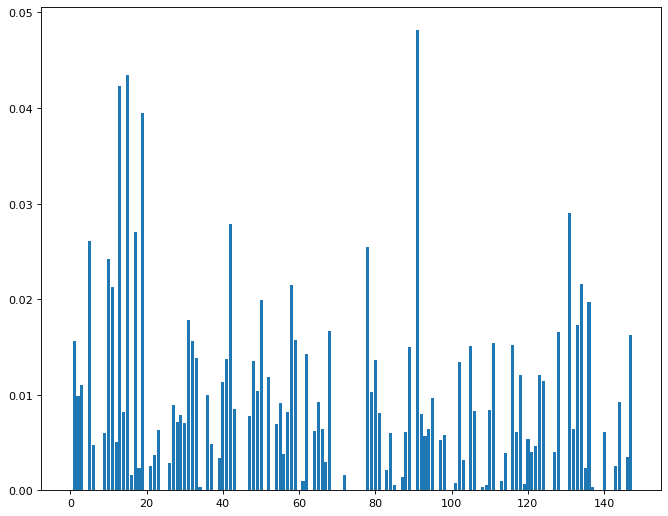

In [13]:
figure(figsize=(10, 8), dpi=80)
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [14]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

for i in range(len(fs.scores_)):
    print('Feature {}: {}'.format(X.columns[i], fs.scores_[i]))

top_fs = sorted(list(fs.scores_),reverse =True)[:20]

Feature covid_safe: 13.963620048375022
Feature Free High Speed Internet (WiFi): 7.740460279717182
Feature Wifi: 3.7114850176936156
Feature Hot tub: 88.13454592001153
Feature Vending machine: 0.8766275349416147
Feature Meeting rooms: 196.79172189873353
Feature Spa: 13.673634183617928
Feature Baggage storage: 0.7583586549751016
Feature Currency exchange: 3.6798357859523936
Feature Air purifier: 12.983728436780444
Feature Air conditioning: 15.522148932811897
Feature Safe: 22.241596721481386
Feature Wake-up service / alarm clock: 22.795579420362962
Feature Refrigerator: 21.43600610255723
Feature Electric kettle: 47.35904495182929
Feature Flatscreen TV: 62.25956718431628
Feature Bath / shower: 0.6317252923437936
Feature Non-smoking rooms: 14.798409217068096
Feature Massage: 2.2461213603980905
Feature Non-smoking hotel: 109.55648045480308
Feature Hair dryer: 2.4239296567126423
Feature Valet parking: 4.697774105298823
Feature Pool: 14.67691316329396
Feature Fitness Center with Gym / Workout R

In [15]:
top_fs

[196.79172189873353,
 182.42555045499344,
 174.70862735927054,
 154.25288698946548,
 124.25133196587528,
 119.94378659212774,
 109.55648045480308,
 108.07278222097483,
 100.49486468586676,
 98.5635197548809,
 98.24284974157011,
 91.70978131813415,
 88.16425121146293,
 88.13454592001153,
 78.10214445989034,
 73.23523002703683,
 67.10030844527076,
 62.87809909517371,
 62.64521271606265,
 62.25956718431628]

In [16]:
imp=[]

for i in range(30):
    imp.append(X.columns[i])
imp

['covid_safe',
 'Free High Speed Internet (WiFi)',
 'Wifi',
 'Hot tub',
 'Vending machine',
 'Meeting rooms',
 'Spa',
 'Baggage storage',
 'Currency exchange',
 'Air purifier',
 'Air conditioning',
 'Safe',
 'Wake-up service / alarm clock',
 'Refrigerator',
 'Electric kettle',
 'Flatscreen TV',
 'Bath / shower',
 'Non-smoking rooms',
 'Massage',
 'Non-smoking hotel',
 'Hair dryer',
 'Valet parking',
 'Pool',
 'Fitness Center with Gym / Workout Room',
 'Bar / lounge',
 'Karaoke',
 'Free shuttle or taxi services',
 'Business Center with Internet Access',
 'Desk',
 'Interconnected rooms available']

In [17]:
X1_test=X_test[['covid_safe',
 'Free High Speed Internet (WiFi)',
 'Wifi',
 'Hot tub',
 'Vending machine',
 'Meeting rooms',
 'Spa',
 'Baggage storage',
 'Currency exchange',
 'Air purifier',
 'Air conditioning',
 'Safe',
 'Wake-up service / alarm clock',
 'Refrigerator',
 'Electric kettle',
 'Flatscreen TV',
 'Bath / shower',
 'Non-smoking rooms',
 'Massage',
 'Non-smoking hotel',
 'Hair dryer',
 'Valet parking',
 'Pool',
 'Fitness Center with Gym / Workout Room',
 'Bar / lounge',
 'Karaoke',
 'Free shuttle or taxi services',
 'Business Center with Internet Access',
 'Desk',
 'Interconnected rooms available']]

X1_train=X_train[['covid_safe',
 'Free High Speed Internet (WiFi)',
 'Wifi',
 'Hot tub',
 'Vending machine',
 'Meeting rooms',
 'Spa',
 'Baggage storage',
 'Currency exchange',
 'Air purifier',
 'Air conditioning',
 'Safe',
 'Wake-up service / alarm clock',
 'Refrigerator',
 'Electric kettle',
 'Flatscreen TV',
 'Bath / shower',
 'Non-smoking rooms',
 'Massage',
 'Non-smoking hotel',
 'Hair dryer',
 'Valet parking',
 'Pool',
 'Fitness Center with Gym / Workout Room',
 'Bar / lounge',
 'Karaoke',
 'Free shuttle or taxi services',
 'Business Center with Internet Access',
 'Desk',
 'Interconnected rooms available']]

In [19]:
# X1_test_enc=X_test_enc[['covid_safe',
#  'Free High Speed Internet (WiFi)',
#  'Wifi',
#  'Hot tub',
#  'Vending machine',
#  'Meeting rooms',
#  'Spa',
#  'Baggage storage',
#  'Currency exchange',
#  'Air purifier',
#  'Air conditioning',
#  'Safe',
#  'Wake-up service / alarm clock',
#  'Refrigerator',
#  'Electric kettle',
#  'Flatscreen TV',
#  'Bath / shower',
#  'Non-smoking rooms',
#  'Massage',
#  'Non-smoking hotel',
#  'Hair dryer',
#  'Valet parking',
#  'Pool',
#  'Fitness Center with Gym / Workout Room',
#  'Bar / lounge',
#  'Karaoke',
#  'Free shuttle or taxi services',
#  'Business Center with Internet Access',
#  'Desk',
#  'Interconnected rooms available']]

# X1_train_enc=X_train_enc[['covid_safe',
#  'Free High Speed Internet (WiFi)',
#  'Wifi',
#  'Hot tub',
#  'Vending machine',
#  'Meeting rooms',
#  'Spa',
#  'Baggage storage',
#  'Currency exchange',
#  'Air purifier',
#  'Air conditioning',
#  'Safe',
#  'Wake-up service / alarm clock',
#  'Refrigerator',
#  'Electric kettle',
#  'Flatscreen TV',
#  'Bath / shower',
#  'Non-smoking rooms',
#  'Massage',
#  'Non-smoking hotel',
#  'Hair dryer',
#  'Valet parking',
#  'Pool',
#  'Fitness Center with Gym / Workout Room',
#  'Bar / lounge',
#  'Karaoke',
#  'Free shuttle or taxi services',
#  'Business Center with Internet Access',
#  'Desk',
#  'Interconnected rooms available']]

In [20]:
oe = OrdinalEncoder()
oe.fit(X1_train)
X1_train_enc = oe.transform(X1_train)
X1_test_enc = oe.transform(X1_test)

In [21]:
classifiers = [
    LogisticRegression(solver = 'lbfgs', class_weight='balanced'),
    SVC(class_weight='balanced'),
    RandomForestClassifier(class_weight = 'balanced'),
    DecisionTreeClassifier(class_weight = 'balanced'),
    AdaBoostClassifier()
    ]

for classifier in classifiers:
    classifier.fit(X1_train_enc, y_train_enc)
    predictions = classifier.predict(X1_test_enc)
    print(str(classifier).split('(')[0], ' - accuracy:', round(classifier.score(X1_test_enc, y_test_enc), 2))
    print(str(classifier).split('(')[0], ' - balanced accuracy:', round(balanced_accuracy_score(y_test_enc, predictions),2))
    print(str(classifier).split('(')[0], ' - macro f1:', round(f1_score(y_test_enc, predictions, average='macro'),2))
    print('class ratios: \n', pd.Series(predictions).value_counts()/predictions.shape[0], '\n')

LogisticRegression  - accuracy: 0.8
LogisticRegression  - balanced accuracy: 0.78
LogisticRegression  - macro f1: 0.73
class ratios: 
 1    0.69774
0    0.30226
dtype: float64 

SVC  - accuracy: 0.9
SVC  - balanced accuracy: 0.86
SVC  - macro f1: 0.85
class ratios: 
 1    0.779661
0    0.220339
dtype: float64 

RandomForestClassifier  - accuracy: 0.92
RandomForestClassifier  - balanced accuracy: 0.83
RandomForestClassifier  - macro f1: 0.86
class ratios: 
 1    0.841808
0    0.158192
dtype: float64 

DecisionTreeClassifier  - accuracy: 0.91
DecisionTreeClassifier  - balanced accuracy: 0.85
DecisionTreeClassifier  - macro f1: 0.86
class ratios: 
 1    0.816384
0    0.183616
dtype: float64 

AdaBoostClassifier  - accuracy: 0.87
AdaBoostClassifier  - balanced accuracy: 0.71
AdaBoostClassifier  - macro f1: 0.75
class ratios: 
 1    0.884181
0    0.115819
dtype: float64 



In [22]:
classifiers = [
    LogisticRegression(solver = 'lbfgs', class_weight='balanced'),
    SVC(class_weight='balanced'),
    RandomForestClassifier(class_weight = 'balanced'),
    DecisionTreeClassifier(class_weight = 'balanced'),
    AdaBoostClassifier()
    ]

for classifier in classifiers:
    classifier.fit(X_train_enc, y_train_enc)
    predictions = classifier.predict(X_test_enc)
    print(str(classifier).split('(')[0], ' - accuracy:', round(classifier.score(X_test_enc, y_test_enc), 2))
    print(str(classifier).split('(')[0], ' - balanced accuracy:', round(balanced_accuracy_score(y_test_enc, predictions),2))
    print(str(classifier).split('(')[0], ' - macro f1:', round(f1_score(y_test_enc, predictions, average='macro'),2))
    print('class ratios: \n', pd.Series(predictions).value_counts()/predictions.shape[0], '\n')

C:\Users\marok\cond3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression  - accuracy: 0.9
LogisticRegression  - balanced accuracy: 0.89
LogisticRegression  - macro f1: 0.86
class ratios: 
 1    0.762712
0    0.237288
dtype: float64 

SVC  - accuracy: 0.93
SVC  - balanced accuracy: 0.93
SVC  - macro f1: 0.9
class ratios: 
 1    0.768362
0    0.231638
dtype: float64 

RandomForestClassifier  - accuracy: 0.94
RandomForestClassifier  - balanced accuracy: 0.86
RandomForestClassifier  - macro f1: 0.89
class ratios: 
 1    0.847458
0    0.152542
dtype: float64 

DecisionTreeClassifier  - accuracy: 0.91
DecisionTreeClassifier  - balanced accuracy: 0.86
DecisionTreeClassifier  - macro f1: 0.86
class ratios: 
 1    0.80226
0    0.19774
dtype: float64 

AdaBoostClassifier  - accuracy: 0.92
AdaBoostClassifier  - balanced accuracy: 0.86
AdaBoostClassifier  - macro f1: 0.87
class ratios: 
 1    0.827684
0    0.172316
dtype: float64 



In [33]:
from sklearn.preprocessing import StandardScaler

classifier=RandomForestClassifier(class_weight = 'balanced')

classifier.fit(X_train_enc, y_train_enc)
predictions = classifier.predict(X_test_enc)
print(str(classifier).split('(')[0], ' - accuracy:', round(classifier.score(X_test_enc, y_test_enc), 2))
print(str(classifier).split('(')[0], ' - balanced accuracy:', round(balanced_accuracy_score(y_test_enc, predictions),2))
print(str(classifier).split('(')[0], ' - macro f1:', round(f1_score(y_test_enc, predictions, average='macro'),2))
print('class ratios: \n', pd.Series(predictions).value_counts()/predictions.shape[0], '\n')
print(classification_report(y_test_enc, predictions))

RandomForestClassifier  - accuracy: 0.94
RandomForestClassifier  - balanced accuracy: 0.86
RandomForestClassifier  - macro f1: 0.89
class ratios: 
 1    0.847458
0    0.152542
dtype: float64 

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        70
           1       0.94      0.99      0.96       284

    accuracy                           0.94       354
   macro avg       0.94      0.86      0.89       354
weighted avg       0.94      0.94      0.93       354



In [26]:
# from imblearn.over_sampling import SMOTE
# from imblearn import under_sampling, over_sampling

# oversample = SMOTE()
# xsmote, ysmote = oversample.fit_resample(X_train_enc, y_train_enc)

# clf=RandomForestClassifier(class_weight = 'balanced')
# clf.fit(xsmote, ysmote)
# predictions=clf.predict(X_test_enc)
# print(classification_report(y_test_enc, predictions))

In [28]:
# classifier.fit(xsmote, ysmote)
# predictions = classifier.predict(X_test_enc)
# print(str(classifier).split('(')[0], ' - accuracy:', round(classifier.score(X_test_enc, y_test_enc), 2))
# print(str(classifier).split('(')[0], ' - balanced accuracy:', round(balanced_accuracy_score(y_test_enc, predictions),2))
# print(str(classifier).split('(')[0], ' - macro f1:', round(f1_score(y_test_enc, predictions, average='macro'),2))
# print('class ratios: \n', pd.Series(predictions).value_counts()/predictions.shape[0], '\n')

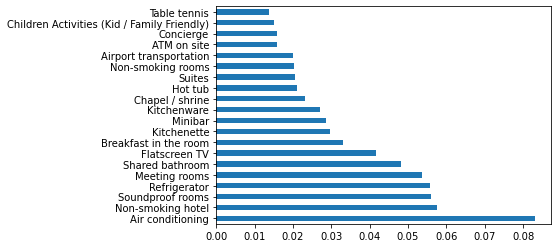

In [29]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 3)
model.fit(X_train_enc,y_train_enc)
Y_pred = model.predict(X_test_enc)

top=pd.Series(model.feature_importances_,index = X.columns)
top.nlargest(20).plot(kind='barh')
plt.show()

In [44]:
top.nlargest(20)

Air conditioning                               0.083107
Non-smoking hotel                              0.057542
Soundproof rooms                               0.056025
Refrigerator                                   0.055774
Meeting rooms                                  0.053645
Shared bathroom                                0.048094
Flatscreen TV                                  0.041761
Breakfast in the room                          0.032923
Kitchenette                                    0.029736
Minibar                                        0.028565
Kitchenware                                    0.027133
Chapel / shrine                                0.023032
Hot tub                                        0.021187
Suites                                         0.020546
Non-smoking rooms                              0.020215
Airport transportation                         0.020011
ATM on site                                    0.015949
Concierge                                      0

In [32]:
# new = [x for x in top.nlargest(20).index]
# X2 = X[new]
# Y

# X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y, test_size =0.1)

In [31]:
# classifiers = [
#     LogisticRegression(solver = 'lbfgs', class_weight='balanced'),
#     SVC(class_weight='balanced'),
#     RandomForestClassifier(class_weight = 'balanced'),
#     DecisionTreeClassifier(class_weight = 'balanced'),
#     AdaBoostClassifier()
#     ]

# for classifier in classifiers:
#     classifier.fit(X2_train, Y2_train)
#     predictions = classifier.predict(X2_test)
#     print(str(classifier).split('(')[0], ' - accuracy:', round(classifier.score(X2_test, Y2_test), 2))
#     print(str(classifier).split('(')[0], ' - balanced accuracy:', round(balanced_accuracy_score(Y2_test, predictions),2))
#     print(str(classifier).split('(')[0], ' - macro f1:', round(f1_score(Y2_test, predictions, average='macro'),2))
#     print('class ratios: \n', pd.Series(predictions).value_counts()/predictions.shape[0], '\n')


In [135]:
# kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

# def getClassifier(ktype):
#     if ktype == 0:
#         # Polynomial kernal
#         return SVC(kernel='poly', degree=8, gamma="auto")
#     elif ktype == 1:
#         # Radial Basis Function kernal
#         return SVC(kernel='rbf', gamma="auto")
#     elif ktype == 2:
#         # Sigmoid kernal
#         return SVC(kernel='sigmoid', gamma="auto")
#     elif ktype == 3:
#         # Linear kernal
#         return SVC(kernel='linear', gamma="auto")

In [134]:
# for i in range(4):
#     svclassifier = getClassifier(i) 
#     svclassifier.fit(X_train_enc, y_train_enc)
#     y_pred = svclassifier.predict(X_test_enc)
#     print("Evaluation:", kernels[i], "kernel")
#     print(classification_report(y_test_enc,y_pred))

In [34]:
from sklearn.metrics import confusion_matrix

C=confusion_matrix(y_test_enc,predictions)
print(C)

[[ 51  19]
 [  3 281]]


In [35]:
estimator = RandomForestClassifier()
parameters = {'max_depth': [10, 30, 50, 70], 'n_estimators': [20, 50, 100]}
scorer = make_scorer(accuracy_score) 

rfc = GridSearchCV(estimator = estimator, scoring = scorer, param_grid  = parameters, cv = 10, return_train_score=True)
rfc.fit(X = X_train_enc,y = y_train_enc)
rfc.cv_results_ 

{'mean_fit_time': array([0.06575019, 0.15626743, 0.29977663, 0.06844976, 0.16578388,
        0.32727842, 0.07296062, 0.16490986, 0.33013384, 0.06937721,
        0.18125622, 0.40256872]),
 'std_fit_time': array([0.01004232, 0.00793148, 0.00988664, 0.00824474, 0.00868017,
        0.00828716, 0.01275241, 0.0090012 , 0.01291213, 0.00820658,
        0.01635498, 0.05282853]),
 'mean_score_time': array([0.00216162, 0.00514073, 0.01146016, 0.00444233, 0.00817854,
        0.01182926, 0.0029757 , 0.00727184, 0.01505635, 0.00663123,
        0.00700736, 0.01595883]),
 'std_score_time': array([0.00483145, 0.00529557, 0.00477307, 0.00635543, 0.00608599,
        0.00461801, 0.00444992, 0.00504608, 0.00580388, 0.00600171,
        0.00515659, 0.00374794]),
 'param_max_depth': masked_array(data=[10, 10, 10, 30, 30, 30, 50, 50, 50, 70, 70, 70],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             

In [36]:
rfc.best_score_

0.9422300427830681

In [37]:
rfc.best_params_

{'max_depth': 70, 'n_estimators': 20}

In [38]:
from sklearn.preprocessing import StandardScaler

classifier=RandomForestClassifier(class_weight = 'balanced', max_depth=70, n_estimators=20)

classifier.fit(X_train_enc, y_train_enc)
predictions = classifier.predict(X_test_enc)
print(str(classifier).split('(')[0], ' - accuracy:', round(classifier.score(X_test_enc, y_test_enc), 2))
print(str(classifier).split('(')[0], ' - balanced accuracy:', round(balanced_accuracy_score(y_test_enc, predictions),2))
print(str(classifier).split('(')[0], ' - macro f1:', round(f1_score(y_test_enc, predictions, average='macro'),2))
print('class ratios: \n', pd.Series(predictions).value_counts()/predictions.shape[0], '\n')
print(classification_report(y_test_enc, predictions))

RandomForestClassifier  - accuracy: 0.94
RandomForestClassifier  - balanced accuracy: 0.86
RandomForestClassifier  - macro f1: 0.89
class ratios: 
 1    0.841808
0    0.158192
dtype: float64 

              precision    recall  f1-score   support

           0       0.93      0.74      0.83        70
           1       0.94      0.99      0.96       284

    accuracy                           0.94       354
   macro avg       0.93      0.86      0.89       354
weighted avg       0.94      0.94      0.94       354



In [39]:
C=confusion_matrix(y_test_enc,predictions)
print(C)

[[ 52  18]
 [  4 280]]


In [40]:
classifier=RandomForestClassifier(class_weight = 'balanced')

classifier.fit(X_train_enc, y_train_enc)
predictions = classifier.predict(X_test_enc)
print(str(classifier).split('(')[0], ' - accuracy:', round(classifier.score(X_test_enc, y_test_enc), 2))
print(str(classifier).split('(')[0], ' - balanced accuracy:', round(balanced_accuracy_score(y_test_enc, predictions),2))
print(str(classifier).split('(')[0], ' - macro f1:', round(f1_score(y_test_enc, predictions, average='macro'),2))
print('class ratios: \n', pd.Series(predictions).value_counts()/predictions.shape[0], '\n')
print(classification_report(y_test_enc, predictions))

RandomForestClassifier  - accuracy: 0.94
RandomForestClassifier  - balanced accuracy: 0.85
RandomForestClassifier  - macro f1: 0.89
class ratios: 
 1    0.858757
0    0.141243
dtype: float64 

              precision    recall  f1-score   support

           0       0.98      0.70      0.82        70
           1       0.93      1.00      0.96       284

    accuracy                           0.94       354
   macro avg       0.96      0.85      0.89       354
weighted avg       0.94      0.94      0.93       354



In [41]:
C=confusion_matrix(y_test_enc,predictions)
print(C)

[[ 49  21]
 [  1 283]]
